# PFR trajectory convex hull demonstration
## Import necessary python packages

In [5]:
# artools
import sys
sys.path.append('../../artools')
import artools
artools = reload(artools)

# anaconda
from ipywidgets import interact

import scipy as sp
from scipy.spatial import ConvexHull

import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
%matplotlib inline

plt.style.use("ggplot")
from mpl_toolkits.mplot3d import Axes3D

## Define kinetics

We use the van de vusse system to demonstrate:
$$A \rightarrow B \rightarrow C$$
$$2A \rightarrow D$$

In [6]:
# 2D van de Vusse kinetics
# A -> B -> C
# 2A -> D


def rate_fn(C,t):
    cA = C[0]
    cB = C[1]
    
    #rate constants
    k1 = 1.0
    k2 = 1.0
    k3 = 10.0

    #r = [rA, rB, rD]
    return sp.array([-k1*cA - 2*k3*cA**2,
                    k1*cA - k2*cB])


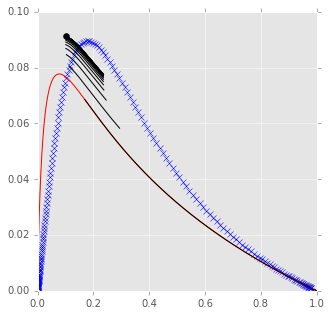

<function __main__.plot_fn>

In [7]:
def plot_fn(L=0.85, pfr_tend=0.21, N=25):
    Cf = sp.array([1.0, 0.0])

    pfr_cs, pfr_ts = artools.calc_pfr_trajectory(Cf, rate_fn, 10)
    cstr_cs, cstr_ts = artools.calc_cstr_locus_fast(Cf, rate_fn, 1000, 200)

    fig = plt.figure(figsize=(5,5))
    ax = fig.gca()

    ax.plot(cstr_cs[:, 0], cstr_cs[:, 1], "bx")
    ax.plot(pfr_cs[:, 0], pfr_cs[:, 1], "r-")

    pfr_cs, pfr_ts = artools.calc_pfr_trajectory(Cf, rate_fn, pfr_tend)
    ax.plot(pfr_cs[:, 0], pfr_cs[:, 1], "k-")

    for i in range(N):
        c_mix = L*pfr_cs[-1, :] + (1.0 - L)*Cf

        pfr_cs, pfr_ts = artools.calc_pfr_trajectory(c_mix, rate_fn, pfr_tend)

        ax.plot(pfr_cs[:, 0], pfr_cs[:, 1], "k-")

    ax.plot(pfr_cs[-1, 0], pfr_cs[-1, 1], "ko")

    plt.show(fig)
    
interact(plot_fn, L=(0,1,0.01), pfr_tend=(0,10,0.1), N=(1,25,1))